# 1. import libraries

In [ ]:
import numpy as np
import pandas as pd

# 2. data preparation --> (1) data loading

In [ ]:
from google.colab import files
files.upload()

In [ ]:
nbastat = pd.read_csv('nba_stats_2020_to_2023.csv')

m = len(nbastat)
print(m)

2955


# 2. data preparation --> (2)feature selection

In [ ]:
features = ['Pos','FG%','3P%','TRB','AST','STL','BLK']

nbastat2 = nbastat[features]
nbastat2

,Pos,FG%,3P%,TRB,AST,STL,BLK
0,C,0.592,0.333,9.3,2.3,0.8,1.1
1,PF,0.557,0.143,10.2,5.1,1.1,1.3
2,C,0.493,0.389,7.4,2.4,0.7,1.6
3,C,0.500,NaN,1.5,0.0,0.0,0.0
4,SG,0.368,0.346,1.8,1.9,0.4,0.2
...,...,...,...,...,...,...,...
2950,PF,0.545,0.176,3.1,1.4,1.0,0.1
2951,PG,0.429,0.335,3.0,10.2,1.1,0.1
2952,C,0.593,0.429,2.6,0.2,0.2,0.2
2953,C,0.627,0.000,4.3,0.7,0.2,0.3


# 2. data preparation --> (3) 결측치 제거

In [ ]:
# isna() 함수 : 결측값을 가지고 있나
rows_with_na = nbastat2[nbastat2.isna().any(axis=1)]

print(rows_with_na)

# dropna
nbastat2 = nbastat2.dropna(axis=0)

print(len(nbastat2))

      Pos    FG%  3P%  TRB  AST  STL  BLK
3       C  0.500  NaN  1.5  0.0  0.0  0.0
13     PF  1.000  NaN  0.6  0.4  0.0  0.0
22    NaN    NaN  NaN  NaN  NaN  NaN  NaN
53    NaN    NaN  NaN  NaN  NaN  NaN  NaN
58      C  0.543  NaN  5.8  0.9  0.2  0.9
...   ...    ...  ...  ...  ...  ...  ...
2885  NaN    NaN  NaN  NaN  NaN  NaN  NaN
2910  NaN    NaN  NaN  NaN  NaN  NaN  NaN
2927   SG    NaN  NaN  1.0  0.0  0.0  0.0
2933  NaN    NaN  NaN  NaN  NaN  NaN  NaN
2935    C  0.637  NaN  7.1  0.4  0.7  1.0

[274 rows x 7 columns]
2681


# 2. data preparation --> (4) 이상치 제거

In [ ]:
# Pos이 C,PG,SG,SF,PF가 아닌 행을 제거
# Pos이 C,PG,SG,SF,PF인 행만 선택

print(len(nbastat2))

nbastat3 = nbastat2[(nbastat2['Pos']=='C') | (nbastat2['Pos']=='PG') | (nbastat2['Pos']=='SG') | (nbastat2['Pos']=='SF') | (nbastat2['Pos']=='PF')]

print(nbastat3)

2681
     Pos    FG%    3P%   TRB   AST  STL  BLK
0      C  0.592  0.333   9.3   2.3  0.8  1.1
1     PF  0.557  0.143  10.2   5.1  1.1  1.3
2      C  0.493  0.389   7.4   2.4  0.7  1.6
4     SG  0.368  0.346   1.8   1.9  0.4  0.2
5     SG  0.466  0.404   2.2   1.4  0.3  0.1
...   ..    ...    ...   ...   ...  ...  ...
2950  PF  0.545  0.176   3.1   1.4  1.0  0.1
2951  PG  0.429  0.335   3.0  10.2  1.1  0.1
2952   C  0.593  0.429   2.6   0.2  0.2  0.2
2953   C  0.627  0.000   4.3   0.7  0.2  0.3
2954   C  0.634  0.000   9.9   1.0  0.4  1.3

[2632 rows x 7 columns]


# 2. data preparation --> (5) 변수 설정

In [ ]:

x1 = nbastat3[['FG%']]
x2 = nbastat3[['3P%']]
x3 = nbastat3[['TRB']]
x4 = nbastat3[['AST']]
x5 = nbastat3[['STL']]
x6 = nbastat3[['BLK']]
y = nbastat3[['Pos']]

m = len(y)
print(m)

2632


# 이상치 제거 확인


In [ ]:
# y의 값이 C,PG,SG,PF,SF만 있는지 확인
unique = y.drop_duplicates()
print(unique)

   Pos
0    C
1   PF
4   SG
7   PG
10  SF


## binary classification : C를 class 1. 그 외의 값을 class 0으로 labeling
## multi-class classifilcation : C는 2, PF 나 SF는 1 , PG나 SG는 0으로 labeling

In [ ]:
# yb = binary classification 용 변수 : C는 1, 그 외는 0
# yt : multiclass classification 용 변수 : C는 2, PF,SF는 1, PG,SG는 0
yb = nbastat3['Pos'].apply(lambda x : 1 if x == 'C' else 0)

yt = nbastat3['Pos'].map({'C':2,'PF':1,'SF':1,'PG':0,'SG':0})

# 2. data preparation --> (6) 변수 벡터 설정

In [ ]:
x0 = np.ones((m,1))
xb = np.c_[x0,x1,x2,x3,x4,x5,x6]

yb = (np.array(yb)).reshape((m,1))

print(xb.shape)
print(yb.shape)

print(type(xb))
print(type(yb))

(2632, 7)
(2632, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 2. data preparation --> (7) train-test set 분할

In [ ]:
# np의 random permutation을 사용
def permutation_split(X,Y,ratio=0.7,random_state = 1004):
  # train set의 크기 : num_a, test set의 크기 : num_b
  num_a = int(X.shape[0]*ratio)
  num_b = X.shape[0] - num_a

  np.random.seed(random_state)
  shuffle = np.random.permutation(X.shape[0])

  X = X[shuffle,:]
  Y = Y[shuffle,:]

  Xa = X[:num_a]
  Ya = Y[:num_a]
  Xb = X[num_a:]
  Yb = Y[num_a:]

  return Xa, Xb, Ya ,Yb

In [ ]:
Xb_train,Xb_test,Y_train,Y_test = permutation_split(xb,yb,0.6)

print(len(Xb_train))
print(len(Xb_test))
print(len(Y_train))
print(len(Y_test))

1579
1053
1579
1053


# 3. numpy를 이용한 구현

## 3. 1 loss 함수 정의

In [ ]:
# cross entropy 함수 : -mean ( y * log(y_hat) + (1-y)log(1-(y_hat) )
# 조심 또 조심 : NaN --> divide-by zero, -inf, +inf
# log (0) -> -inf --> 피해야함
# y_hat의 값이 0 이면 log(y_hat) --> -int
# y_hat의 값이 1이면 log(10y)hat) --> -int
# y_hat의 값을 (0,-1) --> (e -1 -e)
# 1/n --> 1(n+0.00001)와 비슷
def loss_CE(y_hat, y):
  epsilon = 1e-15
  y_hat = np.clip(y_hat,epsilon,1-epsilon)
  return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

In [ ]:
## 3.2 model 정의

In [ ]:
class LogisticRegressionNumpy:
  def __init__(self,learning_rate=0.0001,n_iter=1000): # hyperparameter를 입력
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.theta = None # model의 parameter

  def sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def train(self,X,y):
    # 데이터의 수(m)와 속성의 수(n)를 결정
    m,n = X.shape
    self.theta = np.zeros((n,1))

    loss_arr = []

    # gradient descent method
    for _ in range(self.n_iter):
      # y_hat 계산
      z = X.dot(self.theta)
      y_hat = self.sigmoid(z)

      # loss 계산
      loss = loss_CE(y_hat,y)
      loss_arr.append(loss)

      #gradient 계산
      gradient = (1/m)*X.T.dot(y_hat - y)

      #gradient descent
      self.theta = self.theta - self.learning_rate*gradient

    return loss_arr

  def predict(self,X):
     # y_hat 계산
      z = X.dot(self.theta)
      y_hat = self.sigmoid(z)

      # logistic regression : y_hat의 값이 0.5보다 작으면 0, 크면 1을 return
      y_hat_cis = [1 if i > 0.5 else 0 for i in y_hat]
      return y_hat_cis

## 3.3 훈련

In [ ]:
# model 선언
model = LogisticRegressionNumpy(learning_rate = 0.0001,n_iter=10000)
loss_arr = model.train(Xb_train,Y_train)

Text(0, 0.5, 'loss')

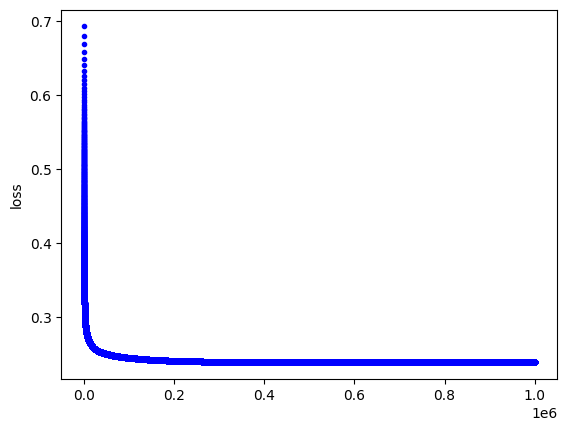

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_arr,'.b')
plt.ylabel('loss')

## 3.4 결과 검증

In [ ]:
# 정확도 prediction = 정답 / 전체 데이터 수

# train data에 대한 결과
prediction = model.predict(Xb_train)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])
print(100* (cnt/len(prediction)))

# 정확도 prediction = 정답 / 전체 데이터 수

# test data에 대한 결과
prediction = model.predict(Xb_test)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])
print(100* (cnt/len(prediction)))

[90.6269791]
[89.74358974]


# 4. pytorch를 이용한 구현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

## 4.2 model 정의

In [ ]:
class LogisticRegressionPytorch(nn.Module):
  def __init__(self, input_size ): # 속성의 갯수 --> n --> 7
    super(LogisticRegressionPytorch, self).__init__ ( )
    self.linear = nn.Linear ( input_size, 1) #7 7개의 입력 (Xb: 1, ..... x6)을 1개의 출력 (z)으로 대응하는 선형 함수 : z = theta * Xb
    self.sigmoid = nn.Sigmoid()

  def forward(self,x ): # 결과를 출력하는 함수 : y_hat = sigmoid(-theta*Xb) --> sigmoid(forward(x))
    y_hat = self.sigmoid (self.linear(x))
    return y_hat

  def predict( self, x): #y_hat --> y_hat의 값이 0.5보다 작으면 0, 크면 1을 리턴
    y_hat = self.forward(x)
    return [1 if p>0.5 else 0 for p in y_hat]

## 4.3 train 함수 정의

In [ ]:
def train (model,X,y,learning_rate=0.0001, n_iter=10000):
  # loss 함수와 gradient method를 선언
  criterion = nn.BCELoss()
  optimizer = optim.SGD(model.parameters() , lr=learning_rate)

  # X와 y의 type를 변경 : X와 y는 numpy의 ndarray --> pytorch의 tensor
  X = torch.tensor(X,dtype=torch.float32)
  y = torch.tensor(y,dtype=torch.float32).view(-1,1)

  loss_arr = []
  for _ in range(n_iter):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output,y)
    loss_arr.append(loss)

    # gradient 구하기
    loss.backward()

    # gradient descent 수정하기
    optimizer.step()

  return loss_arr

## 4.4 train

In [ ]:
model = LogisticRegressionPytorch(input_size = 7)
loss_arr = train(model,Xb_train,Y_train,learning_rate=0.0001,n_iter=10000)

# 4.4 결과 검증

In [ ]:
# 정확도 prediction = 정답 / 전체 데이터 수

# train data에 대한 결과
X = torch.tensor(Xb_train,dtype=torch.float32)

prediction = model.predict(X)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])
print(100* (cnt/len(prediction)))

# 정확도 prediction = 정답 / 전체 데이터 수

# test data에 대한 결과
X = torch.tensor(Xb_test,dtype=torch.float32)
prediction = model.predict(X)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])
print(100* (cnt/len(prediction)))

[90.43698543]
[89.3637227]


# 5. scikit-learn을 이용한 구현

## 5.1 import librarym

In [ ]:
from sklearn.linear_model import LogisticRegression

## 5.2 model 정의 및 훈련

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(Xb_train,Y_train.ravel())

LogisticRegression(max_iter=1000)

## 5.3 결과 검증

In [ ]:
# 정확도 prediction = 정답 / 전체 데이터 수

# train data에 대한 결과
# X = torch.tensor(Xb_train,dtype=torch.float32)

prediction = model.predict(Xb_train)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])
print(100* (cnt/len(prediction)))

# 정확도 prediction = 정답 / 전체 데이터 수

# test data에 대한 결과
#X = torch.tensor(Xb_test,dtype=torch.float32)
prediction = model.predict(Xb_test)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])
print(100* (cnt/len(prediction)))